# Cohort Analysis

In this first chapter, you will learn about cohorts and how to analyze them. You will create your own customer cohorts, get some metrics and visualize your results.

- Mutually exclusive segments - cohorts (groups)
- Compare metrics across **product** lifecycle
- Compare metrics across **Customer** lifecycle

**Types of cohorts**
- Time cohorts
    - Shows the customer behaviour depending on the time they started using the company's product
- Behavior cohorts
    - Customers who purchased a product or subscribed to a service in the past. It groups the customer by the type of product they signed up
- Size cohorts
    - Based on the amount of time spending in some period of time after acquisition, or the product type that the customer spent most of their order amount in some period of time.

## Time Cohorts
Time based cohorts group customers by the time thye completed their first activity.

**Cohort analysis heatmap**
- Rows:
    - First Activity
    - Here - month of acquisition
- Columns:
    - Time since first activity
    - Here - months since acquisition
    


In [1]:
import pandas as pd
import datetime as dt

online = pd.read_csv('./datasets/chapter_1/online.csv', parse_dates = ['InvoiceDate'])
print(online.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70864 entries, 0 to 70863
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   70864 non-null  int64         
 1   InvoiceNo    70864 non-null  int64         
 2   StockCode    70864 non-null  object        
 3   Description  70864 non-null  object        
 4   Quantity     70864 non-null  int64         
 5   InvoiceDate  70864 non-null  datetime64[ns]
 6   UnitPrice    70864 non-null  float64       
 7   CustomerID   70864 non-null  int64         
 8   Country      70864 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 4.9+ MB
None


We are going to use for this excercise the *date*, *price* & *customerID*


In [2]:
def get_month(date):
    return dt.datetime(date.year, date.month, 1)

In [3]:
online['InvoiceMonth'] = online['InvoiceDate'].apply(get_month)

In [4]:
online.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth
0,416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-01
1,482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-01
2,263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-01
3,495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-01
4,204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-01


In [5]:
grouping = online.groupby('CustomerID')['InvoiceMonth']
print(grouping.head())

0       2011-10-01
1       2011-11-01
2       2011-07-01
3       2011-11-01
4       2011-05-01
           ...    
70816   2011-10-01
70817   2011-12-01
70848   2011-02-01
70857   2011-12-01
70860   2010-12-01
Name: InvoiceMonth, Length: 15619, dtype: datetime64[ns]


In [6]:
online['CohortMonth'] = grouping.transform('min')
online.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth
0,416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-01,2011-04-01
1,482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-01,2011-09-01
2,263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-01,2011-07-01
3,495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-01,2011-11-01
4,204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-01,2011-02-01


In [7]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

In [8]:
invoice_year, invoice_month, _ = get_date_int(online, 'InvoiceMonth')
cohort_year, cohort_month, _ = get_date_int(online, 'CohortMonth')

years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month

online['CohortIndex'] = years_diff * 12 + months_diff + 1
online.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
0,416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-01,2011-04-01,7
1,482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-01,2011-09-01,3
2,263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-01,2011-07-01,1
3,495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-01,2011-11-01,1
4,204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-01,2011-02-01,4


Count monthly active customers from each cohort

In [9]:
grouping = online.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index = 'CohortMonth',
                                  columns = 'CohortIndex',
                                  values = 'CustomerID')
cohort_counts.head()

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,716.0,246.0,221.0,251.0,245.0,285.0,249.0,236.0,240.0,265.0,254.0,348.0,172.0
2011-01-01,332.0,69.0,82.0,81.0,110.0,90.0,82.0,86.0,104.0,102.0,124.0,45.0,NaN
2011-02-01,316.0,58.0,57.0,83.0,85.0,74.0,80.0,83.0,86.0,95.0,28.0,NaN,NaN
2011-03-01,388.0,63.0,100.0,76.0,83.0,67.0,98.0,85.0,107.0,38.0,NaN,NaN,NaN
2011-04-01,255.0,49.0,52.0,49.0,47.0,52.0,56.0,59.0,17.0,NaN,NaN,NaN,NaN


## Calculate Cohort Metrics

Store the first column of the cohort as *cohort_size*

In [10]:
cohort_sizes = cohort_counts.iloc[:,0]

Divide all values in the *cohort_counts* table by *cohort_sizes*

In [11]:
retention = cohort_counts.divide(cohort_sizes, axis = 0)
retention

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,1.0,0.343575,0.308659,0.350559,0.342179,0.398045,0.347765,0.329609,0.335196,0.370112,0.354749,0.486034,0.240223
2011-01-01,1.0,0.207831,0.246988,0.243976,0.331325,0.271084,0.246988,0.259036,0.313253,0.307229,0.373494,0.135542,NaN
2011-02-01,1.0,0.183544,0.180380,0.262658,0.268987,0.234177,0.253165,0.262658,0.272152,0.300633,0.088608,NaN,NaN
2011-03-01,1.0,0.162371,0.257732,0.195876,0.213918,0.172680,0.252577,0.219072,0.275773,0.097938,NaN,NaN,NaN
2011-04-01,1.0,0.192157,0.203922,0.192157,0.184314,0.203922,0.219608,0.231373,0.066667,NaN,NaN,NaN,NaN
2011-05-01,1.0,0.160643,0.172691,0.144578,0.208835,0.232932,0.244980,0.088353,NaN,NaN,NaN,NaN,NaN
2011-06-01,1.0,0.159420,0.125604,0.198068,0.236715,0.299517,0.091787,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,1.0,0.161850,0.179191,0.219653,0.254335,0.098266,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,1.0,0.215827,0.201439,0.251799,0.100719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Other Metrics**



In [12]:
#Average
grouping = online.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['Quantity'].mean()
cohort_data = cohort_data.reset_index()
average_quantity = cohort_data.pivot(index = 'CohortMonth',
                                     columns = 'CohortIndex',
                                     values = 'Quantity')
average_quantity.round(1)

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,11.1,12.3,12.2,13.2,13.7,11.3,10.6,12.8,13.2,13.0,14.5,10.9,13.7
2011-01-01,10.9,10.8,10.0,10.1,14.3,13.2,17.4,16.4,18.7,10.2,10.7,13.2,NaN
2011-02-01,12.1,14.3,10.6,11.5,17.5,12.2,17.3,13.2,13.4,15.9,14.3,NaN,NaN
2011-03-01,9.6,14.2,13.0,10.2,16.1,12.7,11.6,11.5,9.0,9.6,NaN,NaN,NaN
2011-04-01,9.9,11.1,12.4,11.5,11.4,7.7,10.4,9.4,6.6,NaN,NaN,NaN,NaN
2011-05-01,14.1,9.6,15.3,11.6,11.9,8.5,9.8,7.3,NaN,NaN,NaN,NaN,NaN
2011-06-01,10.6,16.1,18.1,11.2,12.4,7.2,9.7,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,10.9,16.4,5.6,10.1,6.2,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,10.5,7.4,5.5,5.7,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Cohort Analysis Visualization

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

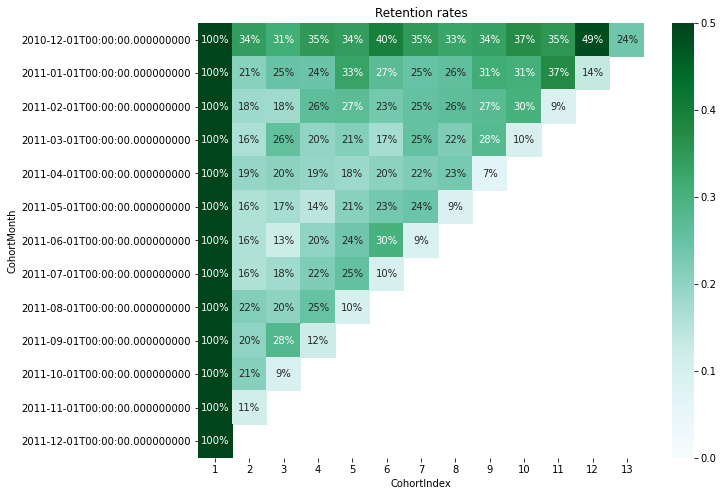

In [14]:
plt.figure(figsize=(10,8))
plt.title('Retention rates')

sns.heatmap(data = retention,
            annot = True,
            fmt = '.0%',
            vmin = 0.0,
            vmax = 0.5,
            cmap = 'BuGn')
plt.show()

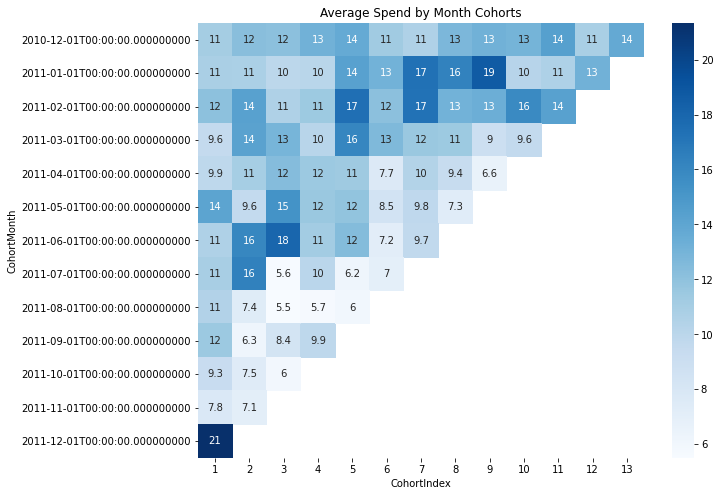

In [15]:
plt.figure(figsize = (10,8))
plt.title('Average Spend by Month Cohorts')
sns.heatmap(data = average_quantity,
            annot = True,
            cmap = 'Blues')
plt.show()